# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [87]:
base_url= "http://api.openweathermap.org/data/2.5/weather?q="
params = {'units': 'imperial'}

city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

print('Beginning Data Retrieval')
print('----------------------------')

for index,city in enumerate(cities): 
    query_url= base_url + city + "&appid=" +weather_api_key
    response = requests.get(query_url, params=params).json()
  
    print(f"Processing Record {index} | {city}.")
    
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        #print("Process Record | " (city_name))
        
    except (KeyError, IndexError): 
        print("City not found. Skipping...")
    
  

Beginning Data Retrieval
----------------------------
Processing Record 0 | santa luzia.
Processing Record 1 | zhangye.
Processing Record 2 | thompson.
Processing Record 3 | balarampur.
Processing Record 4 | hilo.
Processing Record 5 | kaitangata.
Processing Record 6 | promyshlennovskiy.
Processing Record 7 | georgetown.
Processing Record 8 | faya.
Processing Record 9 | ushuaia.
Processing Record 10 | tura.
Processing Record 11 | avarua.
Processing Record 12 | bluff.
Processing Record 13 | cabo san lucas.
Processing Record 14 | kapit.
Processing Record 15 | ribeira grande.
Processing Record 16 | evensk.
Processing Record 17 | port elizabeth.
Processing Record 18 | vaini.
Processing Record 19 | busselton.
Processing Record 20 | mar del plata.
Processing Record 21 | surt.
Processing Record 22 | port alfred.
Processing Record 23 | cape town.
Processing Record 24 | tarauaca.
Processing Record 25 | qaanaaq.
Processing Record 26 | saint-philippe.
Processing Record 27 | hermanus.
Processing R

Processing Record 226 | ostrovnoy.
Processing Record 227 | ponta do sol.
Processing Record 228 | da nang.
Processing Record 229 | marawi.
Processing Record 230 | sebinkarahisar.
Processing Record 231 | buariki.
City not found. Skipping...
Processing Record 232 | vila franca do campo.
Processing Record 233 | san angelo.
Processing Record 234 | lexington.
Processing Record 235 | pevek.
Processing Record 236 | dikson.
Processing Record 237 | diffa.
Processing Record 238 | paraiso.
Processing Record 239 | chikoy.
City not found. Skipping...
Processing Record 240 | puerto quijarro.
Processing Record 241 | ankang.
Processing Record 242 | mareeba.
Processing Record 243 | turkistan.
Processing Record 244 | attawapiskat.
City not found. Skipping...
Processing Record 245 | sabya.
Processing Record 246 | clyde river.
Processing Record 247 | saint-joseph.
Processing Record 248 | berga.
Processing Record 249 | kamenskoye.
City not found. Skipping...
Processing Record 250 | praia.
Processing Record 

Processing Record 448 | preobrazheniye.
Processing Record 449 | vestmanna.
Processing Record 450 | lasa.
Processing Record 451 | inongo.
Processing Record 452 | capinopolis.
Processing Record 453 | falealupo.
City not found. Skipping...
Processing Record 454 | luderitz.
Processing Record 455 | harper.
Processing Record 456 | lompoc.
Processing Record 457 | camapua.
Processing Record 458 | cayenne.
Processing Record 459 | lehrte.
Processing Record 460 | rwamagana.
Processing Record 461 | jumla.
Processing Record 462 | gumdag.
Processing Record 463 | padang.
Processing Record 464 | mansa.
Processing Record 465 | haimen.
Processing Record 466 | labuhan.
Processing Record 467 | gulshat.
City not found. Skipping...
Processing Record 468 | tamiahua.
Processing Record 469 | bilma.
Processing Record 470 | belica.
Processing Record 471 | abu kamal.
Processing Record 472 | varangaon.
Processing Record 473 | nouakchott.
Processing Record 474 | bandar-e lengeh.
Processing Record 475 | tiznit.
Proc

In [89]:
weather_df=pd.DataFrame({"City Name": city_name, "Latitude": lat, "Longitude":lng, "Max Temp":max_temp, "Humidity":humidity,\
                         "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country, "Date":date})
weather_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Luzia,-19.77,-43.85,73.40,35,0,9.17,BR,1590691574
1,Zhangye,38.93,100.45,62.19,39,42,5.88,CN,1590691574
2,Thompson,55.74,-97.86,37.40,86,90,11.41,CA,1590691544
3,Balarāmpur,23.12,86.22,85.33,61,0,5.30,IN,1590691574
4,Hilo,19.73,-155.09,78.80,65,40,3.62,US,1590691574


In [80]:
weather_df.to_csv('cities.csv', header=True)

In [90]:
weather_df = weather_df.dropna()
weather_df.count()

City Name     560
Latitude      560
Longitude     560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [91]:
max_hum= weather_df["Humidity"].max()
max_hum

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

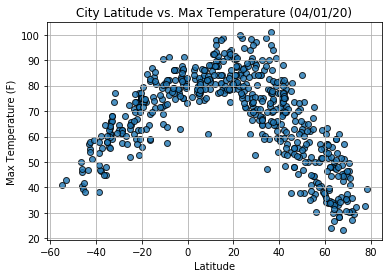

In [92]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvTemp.png")
plt.show()

The plot above shows the latitude and max temerature for the cities in weather_df, the plot shows that at lower latitude (southern hemisphere) the temperatures decrease the further you go and with the higher latitude (northern hemisphere) the temerature also decreases the further you go from zero. At zero, the temerature is the highest. 

## Latitude vs. Humidity Plot

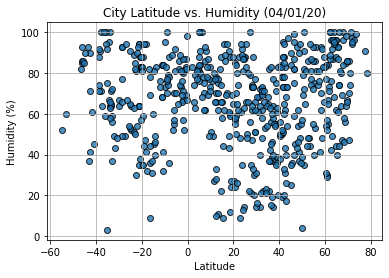

In [93]:
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvHum.png")
plt.show()

This plot shows the latitude and humidity of the cities in weather_df, there isn't a clear relationship with humidity and latitude.

## Latitude vs. Cloudiness Plot

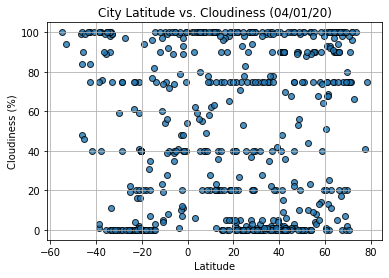

In [94]:
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvCloud.png")
plt.show()

This is a plot for the latitude and cloudiness for the cities in weather_df, there doesn't appear to be a relationship between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

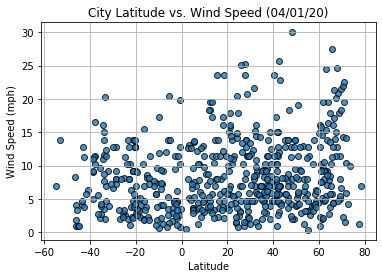

In [95]:
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.grid()
plt.savefig("../WeatherPy/Images/LatvWind.png")
plt.show()

This is a plot for the latitude and wind speed for the cities in weather_df, it appears the windspeeds increase a little above a latitude of about 30 degrees north. 

## Linear Regression

In [99]:
# Create Northern and Southern Hemisphere DataFrames
north_df= weather_df.loc[weather_df['Latitude']>0]
south_df=weather_df.loc[weather_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6748633016070791.


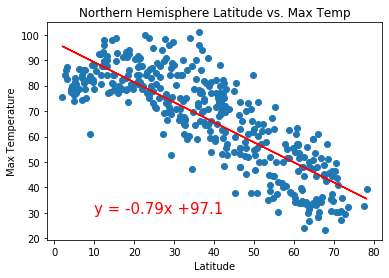

In [145]:
x_value = north_df['Latitude']
y_value = north_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_df["Latitude"], north_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(10,30),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/NPLatvTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6866289047512875.


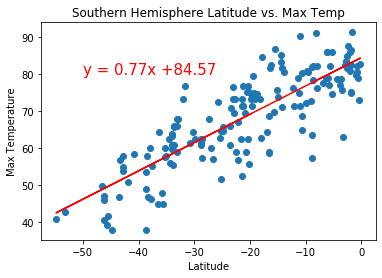

In [146]:
x_value = south_df['Latitude']
y_value = south_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_df["Latitude"], south_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/SPLatvTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018523728518565943.


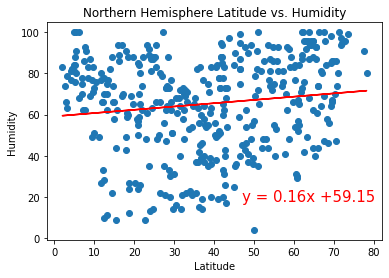

In [147]:
x_value = north_df['Latitude']
y_value = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_df["Latitude"], north_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(47,18),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/NPLatvHum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.8757801278518578e-06.


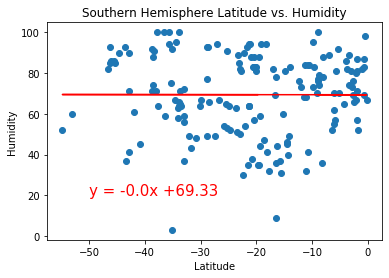

In [148]:
x_value = south_df['Latitude']
y_value = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_df["Latitude"], south_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/SPLatvHum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005604118663394554.


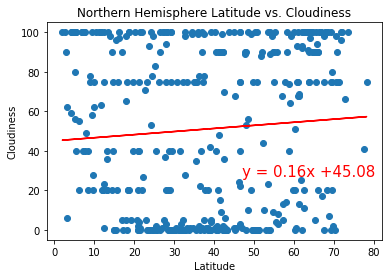

In [149]:
x_value = north_df['Latitude']
y_value = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_df["Latitude"], north_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(47,27),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/NPLatv.Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019267427533618126.


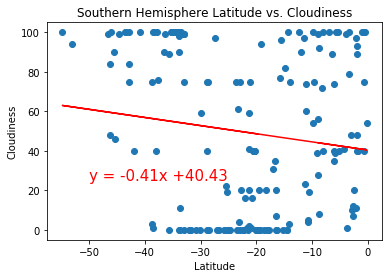

In [150]:
x_value = south_df['Latitude']
y_value = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_df["Latitude"], south_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/SPLatv.Cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01366878709436726.


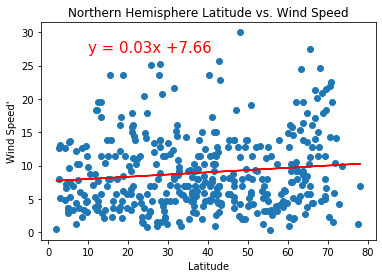

In [151]:
x_value = north_df['Latitude']
y_value = north_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(north_df["Latitude"], north_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel("Wind Speed'")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(10,27),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/NPLatv.Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009253393830797594.


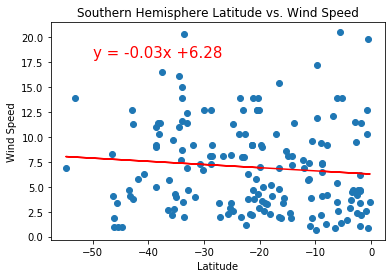

In [152]:
x_value = south_df['Latitude']
y_value = south_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regress_values= x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(south_df["Latitude"], south_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.plot(x_value, regress_values,"r-")

plt.annotate(line_eq,(-50,18),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}.')
plt.savefig("../WeatherPy/Images/SPLatv.Wind.png")
plt.show()